In [1]:
#Import libraries.
import numpy as np 
import pandas as pd 
import cv2
from skimage import io #restoration, filters, img_as_ubyte

# from sklearn.preprocessing import scale, StandardScaler
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import log_loss

# from scipy.stats import mode
# from scipy.ndimage.filters import uniform_filter
# from scipy.ndimage.measurements import variance

# from keras import applications, regularizers
# from keras.models import Sequential, Model
# from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, Input, SeparableConv2D, Add, Average
# from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D, concatenate, Merge
# from keras.preprocessing.image import ImageDataGenerator
# from keras.optimizers import Adam, SGD, Nadam
# from keras.layers.normalization import BatchNormalization
# from keras.layers.merge import Concatenate
# from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau
# from keras.applications.inception_resnet_v2 import InceptionResNetV2
# from keras.applications.xception import Xception
# from keras.applications.inception_v3 import InceptionV3
# from keras.applications.resnet50 import ResNet50
# from keras.applications.vgg19 import VGG19
# from keras.applications.vgg16 import VGG16
# from keras import backend as K

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

In [2]:
image_path = '/Users/mgu/AnacondaProjects/my_proj/NIH_chest_X-ray/images/images/'

In [3]:
#Read the file with confirmed pathology labels - The ground-truth data.
box_df = pd.read_csv('/Users/mgu/AnacondaProjects/my_proj/NIH_chest_X-ray/BBox_List_2017.csv')
box_df.head(2)

,Image Index,Finding Label,x,y,w,h
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525


In [4]:
def img_plot(image_arr, ax, title):
    ax.imshow(image_arr)
    ax.set_title(title)
    ax.grid('off')
    ax.axis('off')

In [5]:
def dist_plot(image_arr, ax, image_name):
    sns.distplot(image_arr.flatten(), rug=False, hist=True, bins=25, ax=ax,
                 hist_kws={'edgecolor':'white','linewidth':1},
                 kde_kws={'color':'black','linewidth':2})
    ax.set_title(name)

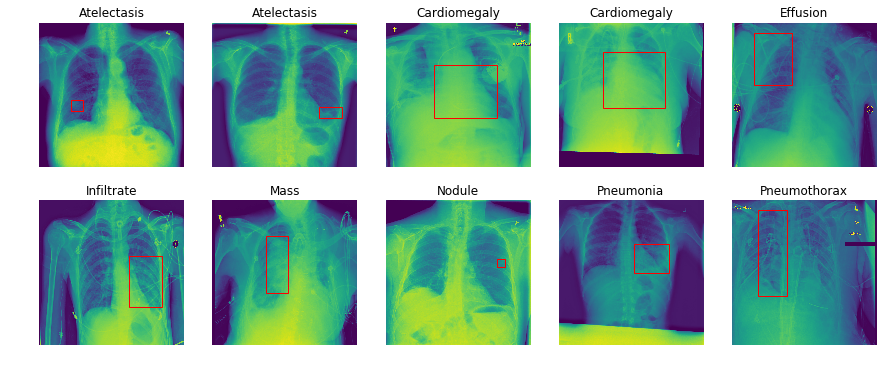

In [6]:
# Plot 10 X-ray images with boxes highlighting the identified pathological sites.

_,axes = plt.subplots(nrows=2, ncols=5, sharex=False, sharey=False, figsize=(15,6))
for n,ax in zip(range(0,1000,100), axes.flat):
    name = box_df.loc[n,'Image Index']
    img_arr = io.imread(image_path+name)
    title = box_df.loc[n,'Finding Label']
    img_plot(img_arr,ax,title)
    rect = Rectangle(xy=(box_df.loc[n,'x'],box_df.loc[n,'y']),
                     width=box_df.loc[n,'w'],height=box_df.loc[n,'h'],
                     angle=0.0,linewidth=1,edgecolor='red',facecolor='none')
    ax.add_patch(rect)

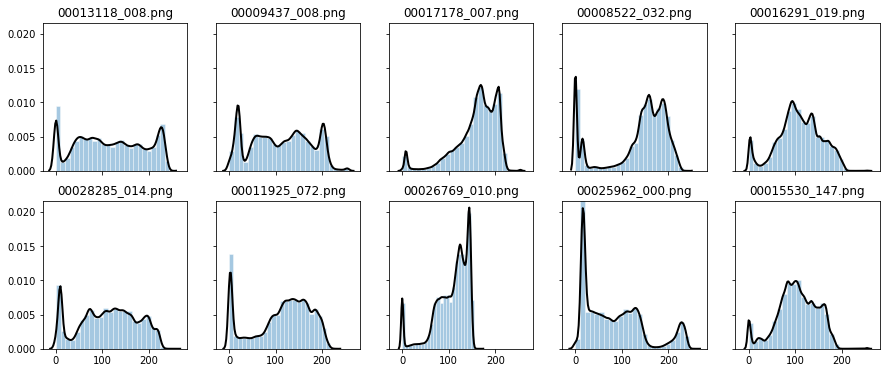

In [7]:
# Plot the histograms for the X-ray images.

_,axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True, figsize=(15,6))
for n,ax in zip(range(0,1000,100), axes.flat):
    name = box_df.loc[n,'Image Index']
    img_arr = io.imread(image_path+name)
    dist_plot(img_arr,ax,name)